#  Name - Prashant Maurya

# In this task, we will predict the number of optimum clusters in the dataset  using unsupervised machine learning algorithm K-means clustering and will represent it visually.

In [2]:
#Importing required libraries
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [3]:
#Loading the data into the dataframe from csv file 
df = pd.read_csv("/users/prashant/desktop/iris.csv")

In [6]:
print(df.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [7]:
#retrieving the required rows and columns
x = df.iloc[:,[0,1,2,3]].values

In [8]:
#finding sum of sqaured distances from centers
sse =[]
k_rng = range(1,11)

for i in k_rng:
    km = KMeans(n_clusters = i)
    km.fit(x)
    sse.append(km.inertia_)
print("Sum of squared distances = ",sse)

Sum of squared distances =  [281831.54466666654, 70581.3808, 31357.65630492197, 17793.6105117263, 11422.5293885799, 7922.1181870370365, 5911.077144174662, 4578.48429795076, 3549.33518382353, 2954.710644230769]


#  Plotting the number of clusters and squared sum of distances to find optimum number of clusters by using elbow method.

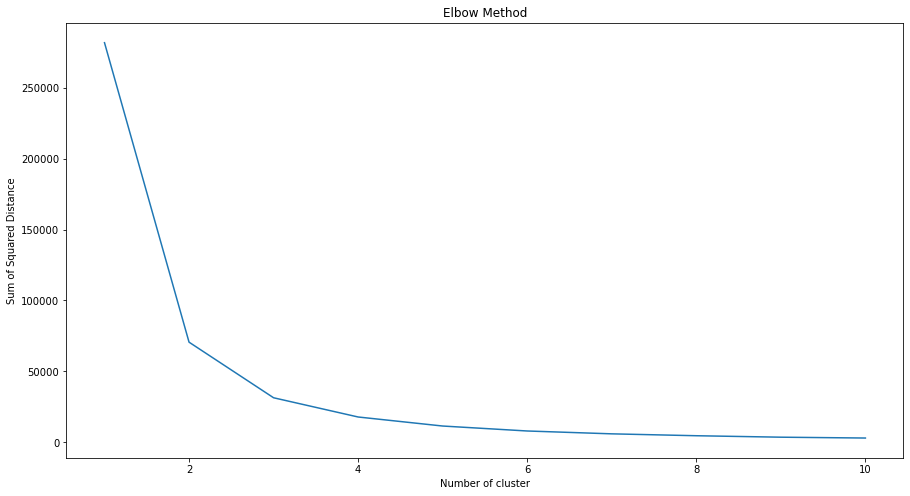

In [9]:
plt.figure(figsize =(15,8))
plt.xlabel("Number of cluster")
plt.ylabel("Sum of Squared Distance")
plt.title("Elbow Method")
plt.plot(k_rng,sse)

# From the above graph, the optimum clusters is where the elbow occurs. In this dataset,the elbow is occuring at 3.

In [10]:
#Using k-means to predict 3 cluster from dataset
kmeans = KMeans(n_clusters = 3)
y_predicted = kmeans.fit_predict(x)
print(y_predicted)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [11]:
#Adding predicted clusters as a column in dataframe
df["Cluster"] = y_predicted
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


# Visualizing the clusters

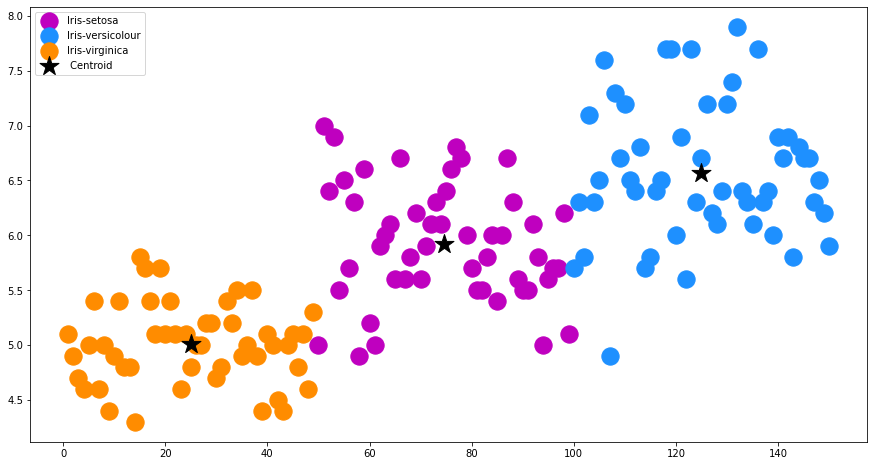

In [12]:
%matplotlib inline
df1 =df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]
fig,ax = plt.subplots(figsize =(15,8))
ax.scatter(df1.iloc[:,0],df1.iloc[:,1],c= "m",s = 300,label = "Iris-setosa")
ax.scatter(df2.iloc[:,0],df2.iloc[:,1],c ="dodgerblue",s = 300,label = "Iris-versicolour",marker = "o")
ax.scatter(df3.iloc[:,0],df3.iloc[:,1],c ="darkorange",s = 300,marker = "o",label= "Iris-virginica")
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = "black",marker = "*",label =" Centroid",s = 400)
ax.legend()